In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNet, BayesianRidge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy import stats

In [3]:
data = pd.read_csv("diamonds.csv")

In [5]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
data.sample(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
14796,14797,1.04,Ideal,D,SI1,61.7,57.0,5952,6.55,6.51,4.03
16370,16371,0.33,Premium,D,SI1,60.4,60.0,608,4.41,4.46,2.68
53830,53831,0.72,Ideal,F,SI1,61.2,55.0,2737,5.78,5.82,3.55
30908,30909,0.43,Ideal,F,SI1,61.4,55.0,745,4.88,4.92,3.01
14585,14586,1.05,Premium,H,VS1,60.1,57.0,5886,6.62,6.59,3.97


In [9]:
data.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [11]:
#Preprocessing na kategoriskite promenlivi
data = pd.get_dummies(data, columns=['cut', 'color', 'clarity'], drop_first=True)

In [13]:
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

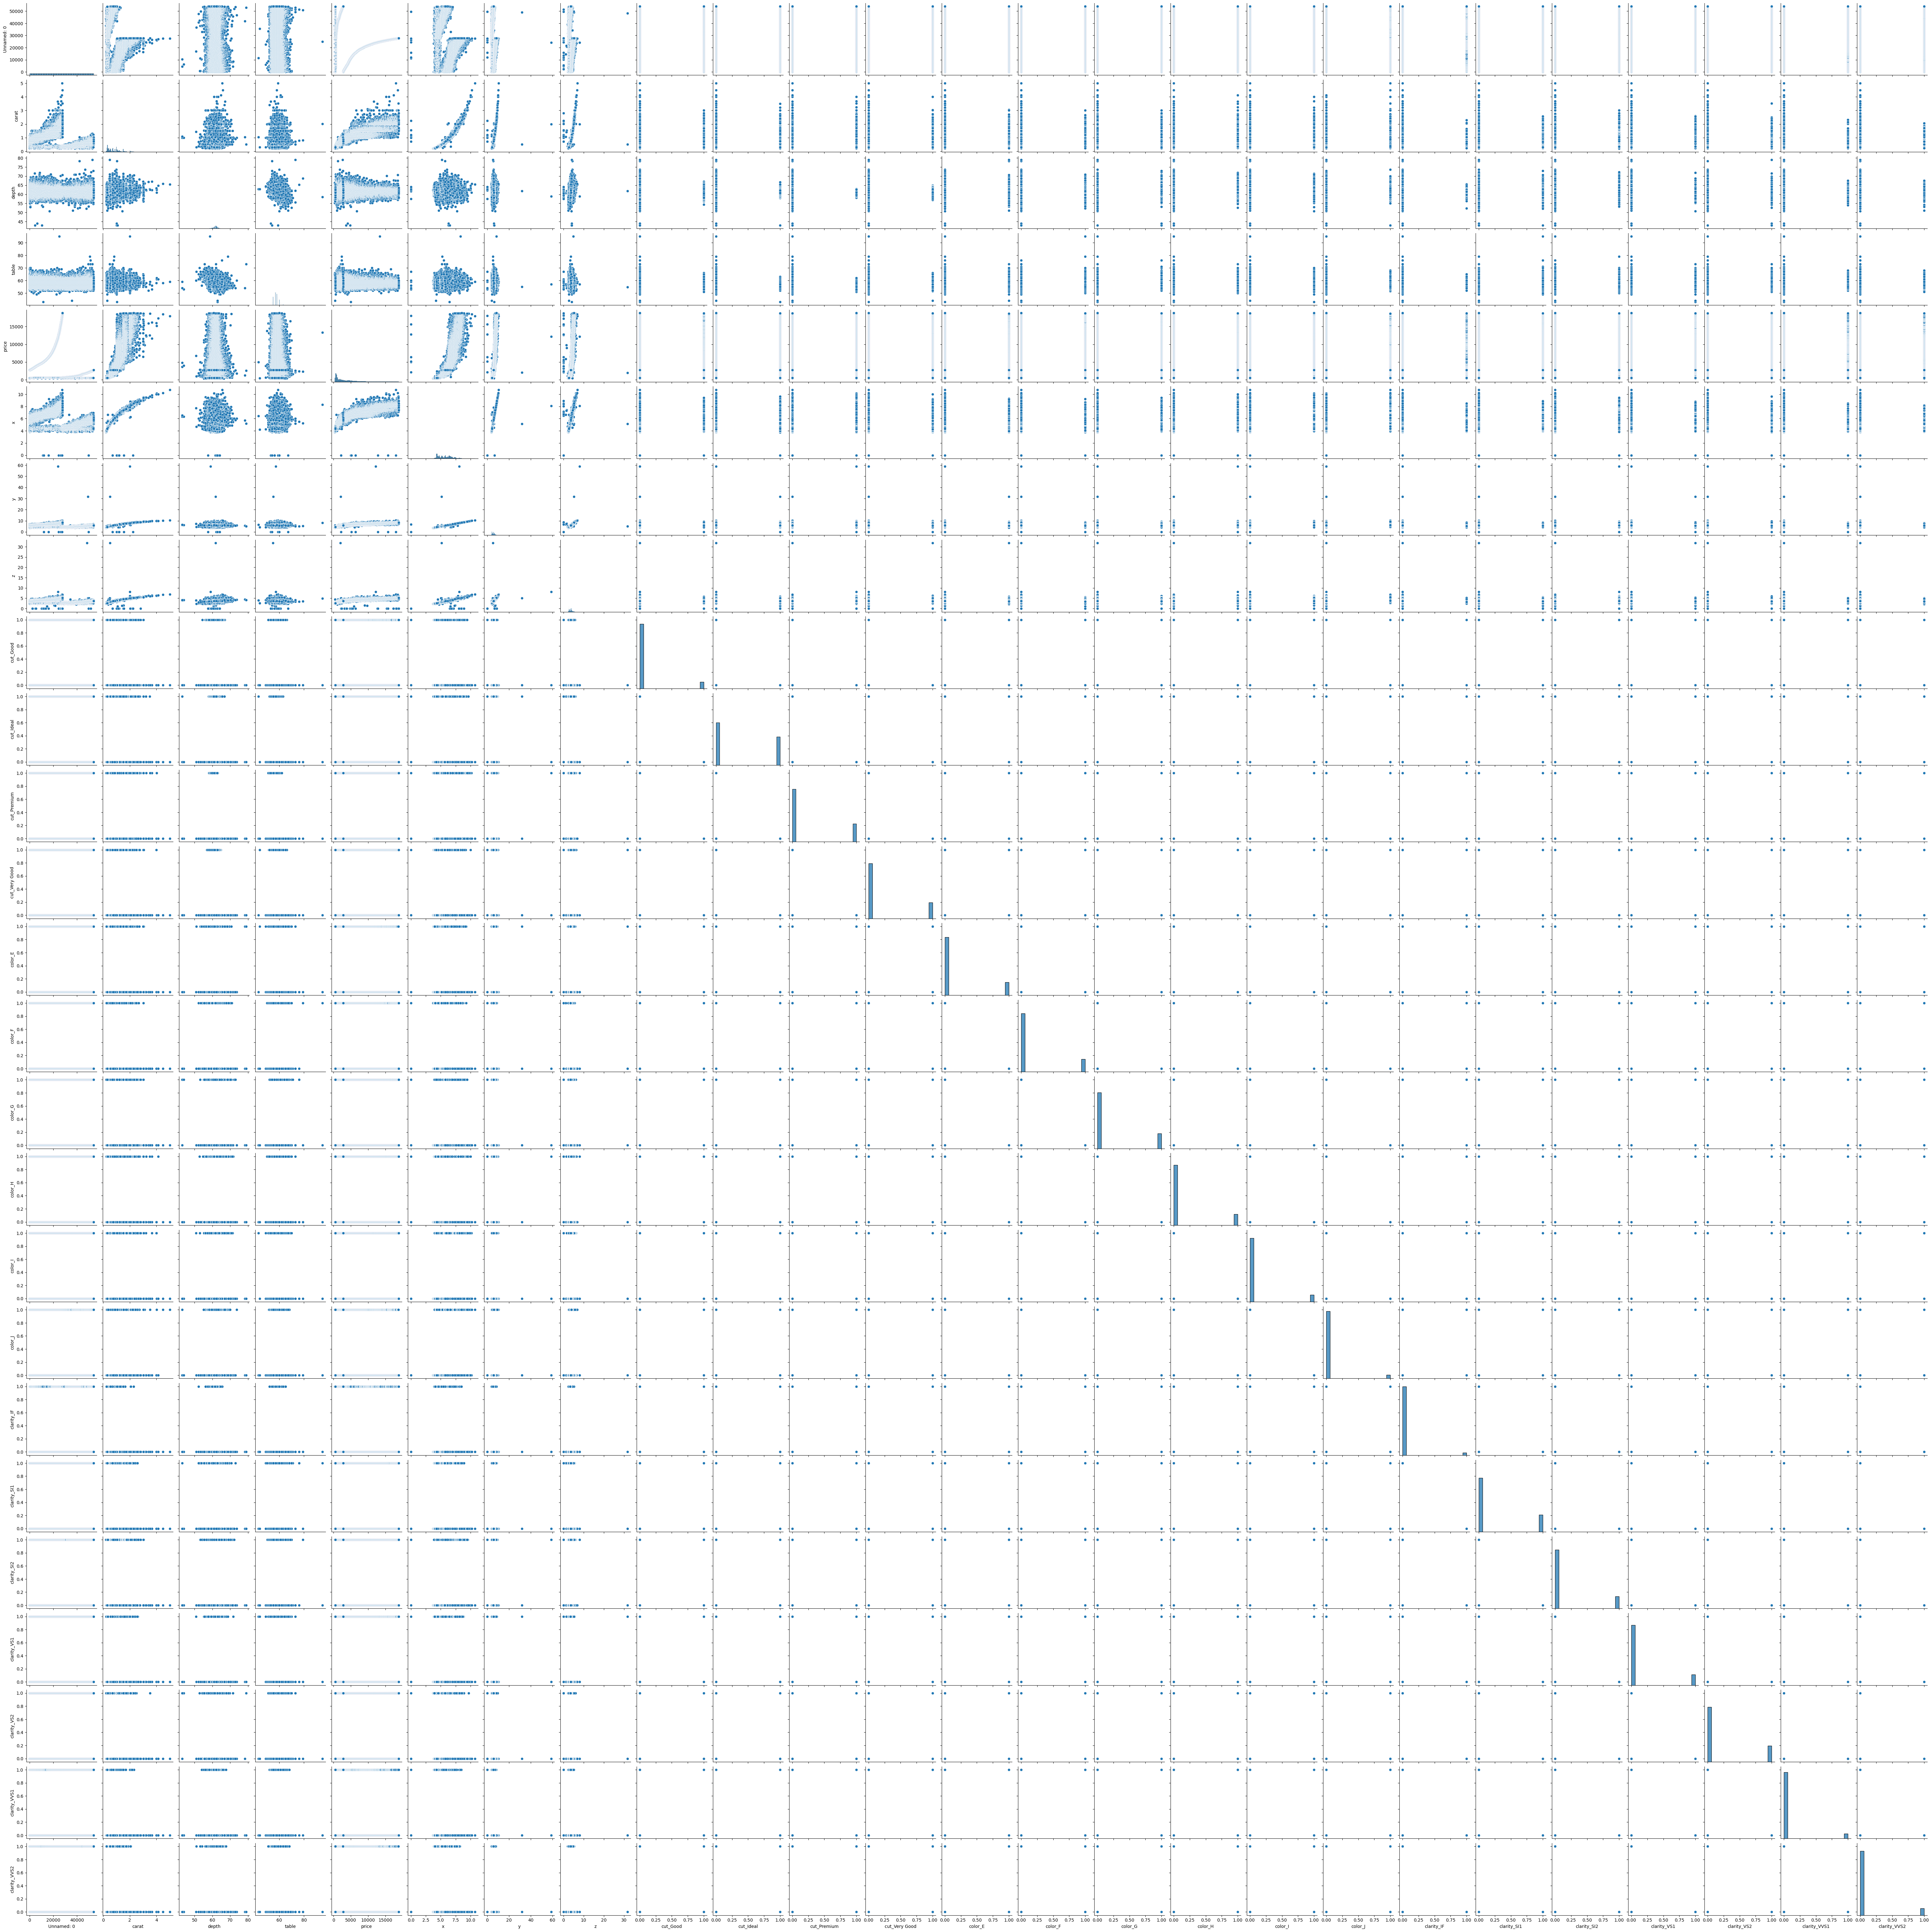

In [17]:
sns.pairplot(data)

<Axes: xlabel='price', ylabel='Count'>

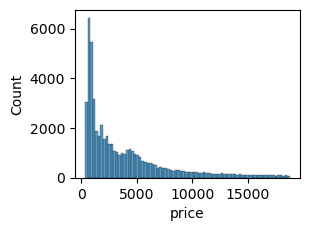

In [21]:
#Raspredelba na cenite
plt.subplot(2, 2, 1)
sns.histplot(data['price'])

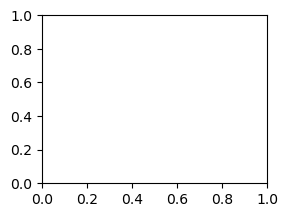

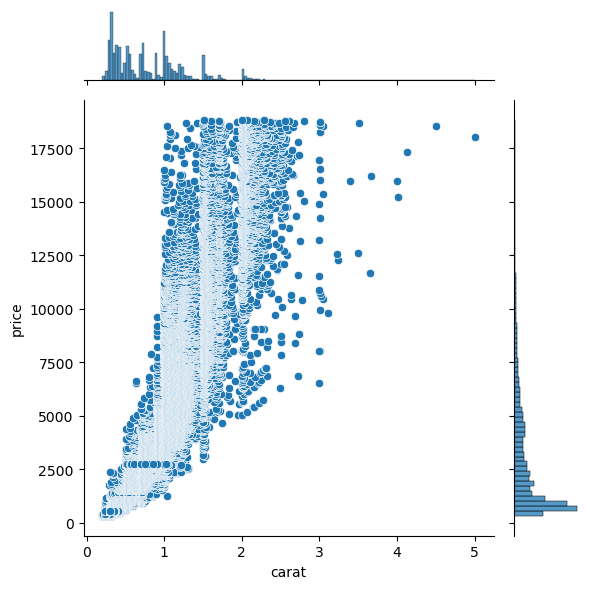

In [19]:
#Korelacija megju karatite i cenite
plt.subplot(2, 2, 2)
sns.jointplot(x='carat', y='price', data=data, kind='scatter')
plt.tight_layout()

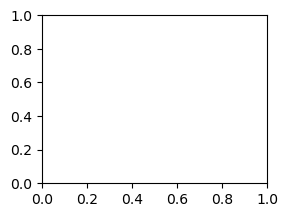

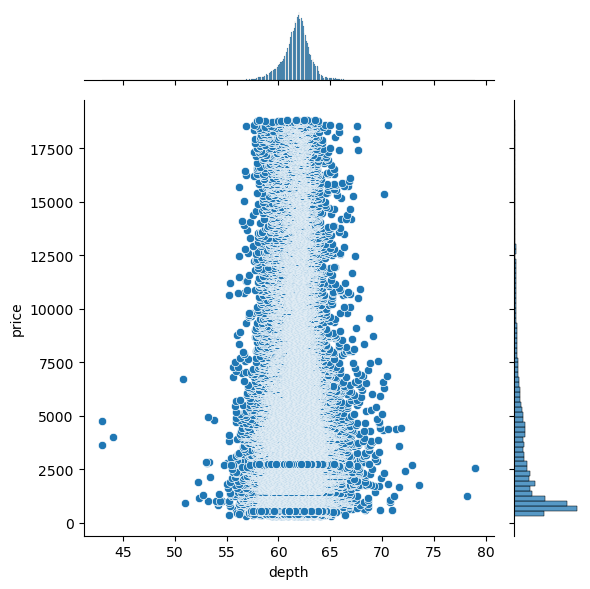

In [26]:
#Korelacija megju dlabochinata i cenite
plt.subplot(2, 2, 3)
sns.jointplot(x='depth', y='price', data=data, kind='scatter')
plt.tight_layout()

<Axes: >

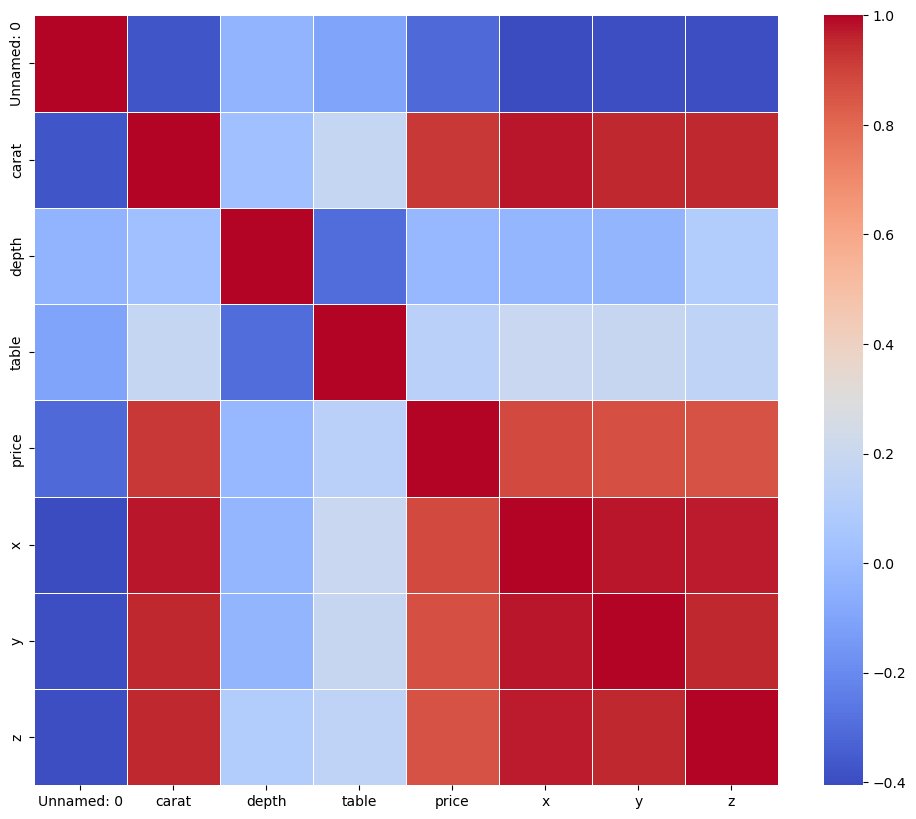

In [28]:
#Korelaciona matrica
plt.figure(figsize=(12, 10))
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)

In [32]:
data = data.drop(columns='Unnamed: 0')

In [34]:
X = data.drop('price', axis=1)
y = data['price']

In [36]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [40]:
#Definiranje na modelite
linear_model = LinearRegression()
ridge_model = RidgeCV(alphas=np.logspace(-3, 3, 100), cv=5)
lasso_model = LassoCV(alphas=np.logspace(-3, 3, 100), cv=5, max_iter=10000)
elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=10000)
bayesian_model = BayesianRidge()

In [46]:
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print('Linear Regression mse:', mse)
print('Linear Regression mae:', mae)

Linear Regression mse: 1288705.4778516784
Linear Regression mae: 737.151366593396


In [48]:
alphas = np.logspace(-3, 3, 10)
lasso = LassoCV(alphas=alphas)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print('Lasso mse:', mse)
print('Lasso mae:', mae)
print(lasso.alpha_)

Lasso mse: 1288650.4593647635
Lasso mae: 737.3592362718286
0.021544346900318832


In [50]:
ridge = RidgeCV(alphas=alphas)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print('Ridge mse:', mse)
print('Ridge mae:', mae)
print(ridge.alpha_)

Ridge mse: 1288604.478470893
Ridge mae: 738.1102357883627
0.1


In [52]:
elastic = ElasticNet()
elastic.fit(X_train, y_train)
y_pred = elastic.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print('Elastic mse:', mse)
print('Elastic mae:', mae)

Elastic mse: 14519837.408567624
Elastic mae: 2857.7878890821657


In [54]:
bayes_ridge = BayesianRidge()
bayes_ridge.fit(X_train, y_train)
y_pred = bayes_ridge.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print('Bayesian ridge mse:', mse)
print('Bayeian ridge mae:', mae)
print(bayes_ridge.alpha_)
print(bayes_ridge.lambda_)
print(bayes_ridge.coef_)

Bayesian ridge mse: 1288692.1549280416
Bayeian ridge mae: 737.238001195385
7.847145799204707e-07
7.1456653689590714e-09
[ 54229.31507534  -2337.92050389  -1382.29353962 -10794.18088525
   -217.81014311  -1167.18839342    591.92528836    859.00103897
    782.09806792    750.15300709   -218.1788439    -279.74401905
   -495.57357897   -998.97179869  -1479.36840259  -2371.71647813
   5365.36490841   3674.57205189   2700.71519557   4579.12526618
   4262.84362697   5014.71674237   4957.55120529]


In [56]:
#Dobienata greshka navidum izgleda ogromna no da ja razgledame kolonata price so cel da vidime za kakov opseg na vrednosti se raboti
#Da ja razgledame kolonata price
print("Статистика за колоната price:")
print(data['price'].describe())

#Minimalna i maksimalna cena
print(f"Минимална цена: ${data['price'].min()}")
print(f"Максимална цена: ${data['price'].max()}")
print(f"Опсег на цените: ${data['price'].max() - data['price'].min()}")

Статистика за колоната price:
count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64
Минимална цена: $326
Максимална цена: $18823
Опсег на цените: $18497


In [60]:
#Kako mse se odnesuva
mse_value = 737.2380
rmse = np.sqrt(mse_value)
price_range = data['price'].max() - data['price'].min()
price_mean = data['price'].mean()

print(f"RMSE: {rmse:.2f}") #√MSE
print(f"RMSE како процент од опсегот: {(rmse/price_range)*100:.2f}%")
print(f"RMSE како процент од просекот: {(rmse/price_mean)*100:.2f}%")

RMSE: 27.15
RMSE како процент од опсегот: 0.15%
RMSE како процент од просекот: 0.69%


In [62]:
#So presmetkata na relativnata greshka dobivme deka dobienata greshka ispagja okolu 27dolari, toa e prosechnoto otstapuvanje
#Greshkata e prifatliva bidejkji e pomalku od 1%